# Julia 基礎圖表繪製: Plots 套件

本範例需要使用到的套件有 Plots、StatsPlots，請在執行以下範例前先安裝。

```
] add Plots
] add StatsPlots
```

In [1]:
using RDatasets, Plots

## 圓餅圖

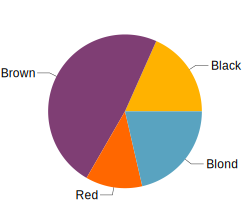

In [2]:
haireyecolor = dataset("datasets", "HairEyeColor")
haircolor = by(haireyecolor, :Hair, Freq=:Freq => sum)
p = pie(haircolor[!, :Hair], haircolor[!, :Freq]; size=(250, 200))

In [3]:
savefig(p, "pie.png")

## 樹狀圖

## Marginal histogram

In [4]:
using StatsPlots
gr()

Plots.GRBackend()

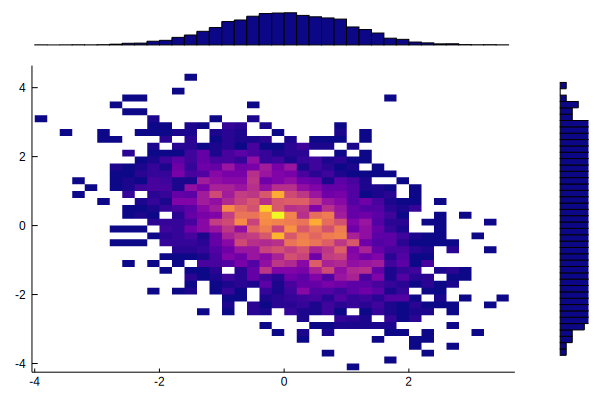

In [5]:
n = 5000
x = randn(n)
y = -0.5x + randn(n)
p = marginalhist(x, y, fc=:plasma, bins=40)

In [6]:
savefig(p, "marghist.png")

## 3D 繪圖

In [7]:
n = 500
x = range(-8., stop=8., length=n)
y = range(-2., stop=2., length=n)

-2.0:0.008016032064128256:2.0

In [8]:
f(x,y) = x*exp(-(x-round(Int, x))^2-y^2)

f (generic function with 1 method)

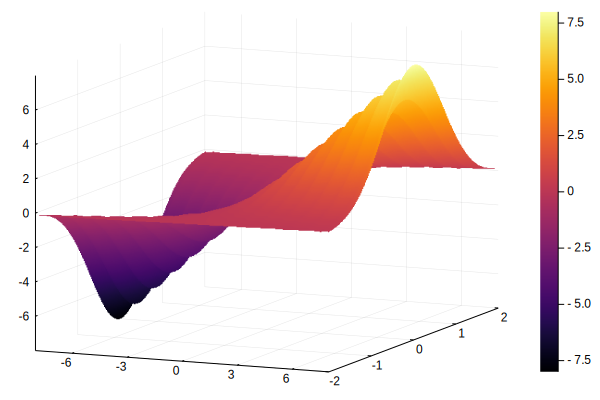

In [9]:
p = plot(x, y, f, st=:surface)

In [10]:
savefig(p, "3d_function.png")

## 3D 動畫

┌ Info: Saved animation to 
│   fn = /media/yuehhua/Workbench/workspace/cupoy/tmp.gif
└ @ Plots /home/yuehhua/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/media/yuehhua/Workbench/workspace/cupoy/tmp.gif")
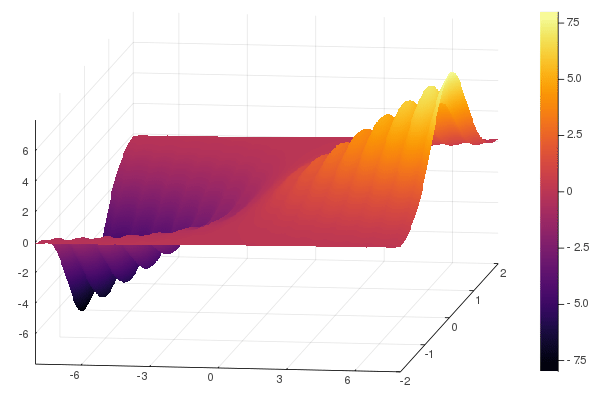

In [11]:
n = 500
x = range(-8., stop=8., length=n)
y = range(-2., stop=2., length=n)
f(x,y) = x*exp(-(x-round(Int, x))^2-y^2)
@gif for i in range(0, stop=2π, length=100)
    p = plot(x, y, f, st=:surface)
    plot!(p, camera=(15*cos(i), 40))
end

## 動畫輸出

┌ Info: Saved animation to 
│   fn = /media/yuehhua/Workbench/workspace/cupoy/animate.gif
└ @ Plots /home/yuehhua/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/media/yuehhua/Workbench/workspace/cupoy/animate.gif")
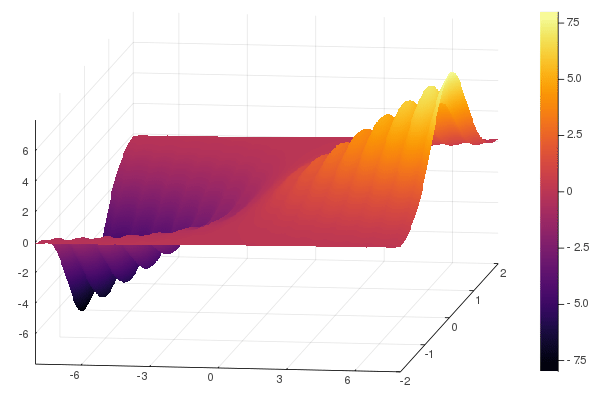

In [12]:
p = plot(1)
ani = @animate for i in range(0, stop=2π, length=100)
    p = plot(x, y, f, st=:surface)
    plot!(p, camera=(15*cos(i), 40))
end
gif(ani, "animate.gif", fps = 30)